In [29]:
file=open("dump_2.lammpstrj",'r')
i=0
while i<4500:
    print(file.readline(),end='')
    i+=1

ITEM: TIMESTEP
200
ITEM: NUMBER OF ATOMS
4480
ITEM: BOX BOUNDS ff ff pp
0.0000000000000000e+00 7.0710678118654755e+01
0.0000000000000000e+00 7.0710678118654755e+01
0.0000000000000000e+00 1.4142135623730951e+00
ITEM: ATOMS id type xs ys zs
1 1 0.0292849 0.0292849 0
2 1 0.0423729 0.0423729 0
3 1 0.0443456 0.0284359 0
96 1 0.0284359 0.0443456 0
98 1 0.0523162 0.0523162 0
4 1 0.0561267 0.0369648 0
5 1 0.069535 0.0306429 0
100 1 0.0665044 0.0469022 0
6 1 0.0805959 0.0428787 0
7 1 0.084324 0.0288855 0
8 1 0.0961224 0.0374791 0
102 1 0.0917803 0.0525001 0
9 1 0.109966 0.0302675 0
10 1 0.121176 0.040936 0
104 1 0.106821 0.0474123 0
11 1 0.1313 0.0294512 0
12 1 0.139231 0.0421824 0
13 1 0.14751 0.0295979 0
106 1 0.129667 0.0534805 0
108 1 0.152671 0.0492694 0
14 1 0.160967 0.0367072 0
15 1 0.173533 0.0291155 0
16 1 0.180463 0.0419494 0
110 1 0.168172 0.0504575 0
17 1 0.188881 0.0294515 0
18 1 0.204015 0.0295771 0
112 1 0.196374 0.0429713 0
19 1 0.219731 0.0293186 0
20 1 0.227043 0.0423101 0
21 

2663 1 0.0489019 0.606344 0
2758 1 0.0448959 0.621249 0
2664 1 0.0628376 0.614566 0
2665 1 0.0728804 0.60264 0
2760 1 0.0748304 0.624656 0
2666 1 0.0844835 0.612878 0
2667 1 0.0976266 0.605046 0
2762 1 0.0941964 0.624829 0
2668 1 0.107063 0.616592 0
2669 1 0.111568 0.599573 0
2670 1 0.122178 0.61054 0
2764 1 0.118204 0.626306 0
2671 1 0.137068 0.604646 0
2766 1 0.13315 0.620666 0
2672 1 0.147682 0.615316 0
2673 1 0.152886 0.600673 0
2768 1 0.158792 0.62542 0
2674 1 0.163627 0.610502 0
2675 1 0.179575 0.605911 0
2770 1 0.174336 0.620571 0
2676 1 0.190598 0.615689 0
2677 1 0.195604 0.600981 0
2678 1 0.206155 0.611829 0
2772 1 0.200539 0.626206 0
2679 1 0.222098 0.605131 0
2680 1 0.23243 0.615591 0
2681 1 0.237016 0.60038 0
2774 1 0.218004 0.621035 0
2776 1 0.242373 0.625802 0
2682 1 0.248094 0.610872 0
2683 1 0.262878 0.605244 0
2684 1 0.270015 0.618323 0
2778 1 0.256828 0.623756 0
2685 1 0.279874 0.607624 0
2686 1 0.294586 0.610827 0
2780 1 0.2848 0.621918 0
2687 1 0.305299 0.600957 0
2

<IPython.core.display.Javascript object>


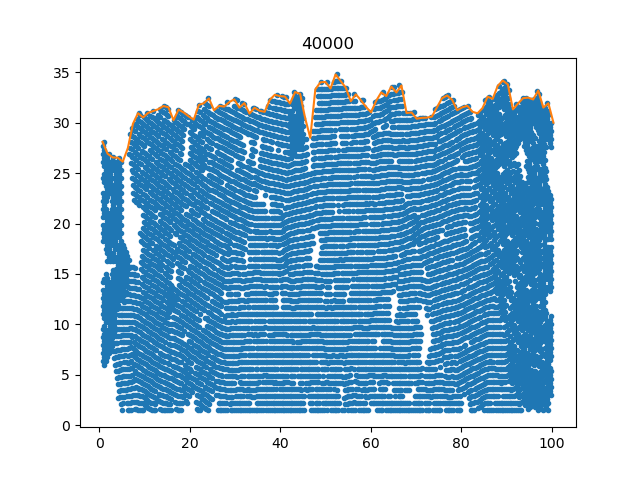

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
file=open("largedump.lammpstrj",'r')
t=0
r=1.12
start=9
xmax,ymax=0,0
hss=[]
xvals=[]
fig,ax=plt.subplots()
while t<40000:
    if "ITEM: NUMBER OF ATOMS" in file.readline():
        t+=1
        atoms=int(file.readline())
        start=start+atoms+9
        if t%1000==0:
            data=np.loadtxt("largedump.lammpstrj",skiprows=start,usecols=(2,3),max_rows=atoms)
            try:
                xs,ys=data[:,0],data[:,1]
            except:
                break
            if xs.max()>xmax:
                xmax=xs.max()
                xconv=100/(xmax)
            if ys.max()>ymax:
                ymax=ys.max()
                yconv=50/(ymax)
            xss=xs*xconv
            yss=ys*yconv
            bins=np.arange(xss.min()-r/2,xss.max()+r/2,r)
            xvals.append(bins)
            hs=np.zeros_like(bins)
            for i in range(len(xss)):
                idx=np.searchsorted(bins,xss[i])-1
                if hs[idx]<yss[i]:
                    hs[idx]=yss[i]
            hss.append(hs)
            ax.cla()
            ax.plot(xss,yss,'.')
            ax.plot(bins+r/2,hs)
            fig.canvas.draw()
            plt.pause(0.1)
            plt.title(f'{t}')
            fig.canvas.flush_events()

In [5]:
hs.shape

(39, 89)

In [5]:
len(bins),len(np.vstack(hss[:-1])[:,:-1][0]),hs.shape

(89, 88, (39, 88))

<IPython.core.display.Javascript object>


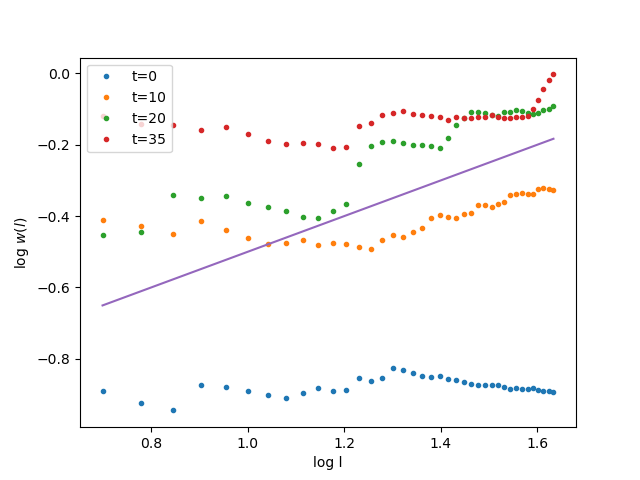

Text(0, 0.5, 'log $w(l)$')

In [4]:
from scipy.optimize import curve_fit
def linear(x, a, b):
    return a * x + b
ts=[0,10,20,35]
ws=[]
hs=np.vstack(hss[:-1])[:,:-1]
ls=range(5,hs.shape[1]//2)
for t in ts:
    w=[]
    for l in ls:
        xs=range(len(hs[t,hs.shape[1]//2-l:hs.shape[1]//2+l]))
        popt, pcov = curve_fit(linear, xs ,hs[t,hs.shape[1]//2-l:hs.shape[1]//2+l])
        ss=np.var(hs[t,hs.shape[1]//2-l:hs.shape[1]//2+l]-linear(xs,popt[0],popt[1]))
        w.append(ss**0.5)
    ws.append(w)
plt.figure()
for i in range(len(ts)):
    plt.plot(np.log10(ls),np.log10(ws[i]),'.',label='t={}'.format(ts[i]))
    plt.legend()
plt.xlabel('log l')
plt.ylabel('log $w(l)$')

In [6]:
plt.plot(np.log10(ls),np.log10(ls)*0.5-1)

In [69]:
hs

array([[49.42356126, 49.81516693, 49.7906227 , ..., 49.44660278,
        49.50145162, 49.51753059],
       [49.44374763, 49.83214753, 49.77163849, ..., 49.46173004,
        49.51612806, 49.53781715],
       [49.43137534, 49.82698823, 49.79417911, ..., 49.42000485,
        49.4809647 , 49.48792724],
       ...,
       [ 3.02287722,  2.28528809,  1.51502508, ...,  4.29836565,
         5.70192487,  5.19481105],
       [ 3.01826391,  1.47720693,  1.53344827, ...,  2.90204949,
         3.78478518,  4.69430915],
       [ 3.03909144,  1.51414349,  1.50223202, ...,  2.53153683,
         3.53015634,  7.25702716]])

<IPython.core.display.Javascript object>


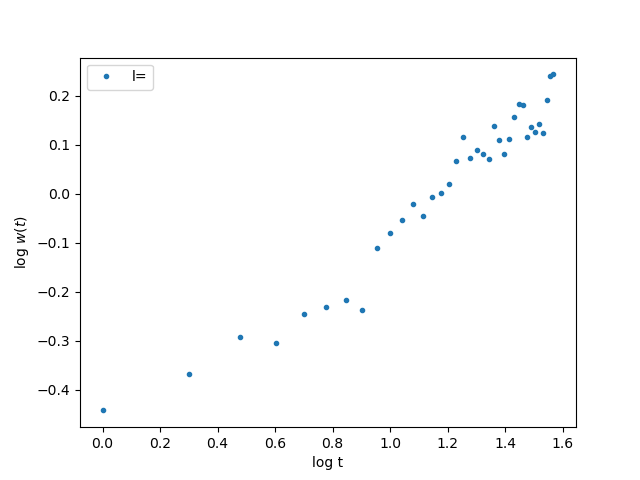

C:\Users\Anpuj\AppData\Local\Temp\ipykernel_10808\2128869735.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(range(len(w))),np.log10(np.mean(ws,axis=0)),'.',label='l=')


Text(0, 0.5, 'log $w(t)$')

In [21]:
from scipy.optimize import curve_fit
def linear(x, a, b):
    return a * x + b
ts=range(len(hs))
ws=[]
hs=np.array(hs)#[:,100:600]
ls=range(30,40)
t_corr=[]
for l in ls:
    w=[]
    for t in range(1,len(ts)):
        ss=0
        if l==30:
            t_corr.append(np.mean(hs[t]))
        for i in range(0,hs.shape[1],l):
            xs=range(len(hs[t,i:i+l]))
            popt, pcov = curve_fit(linear, xs ,hs[t,i:i+l])
            ss+=np.var(hs[t,i:i+l]-linear(xs,popt[0],popt[1]))
        w.append(ss**0.5)
    ws.append(w)
plt.figure()
plt.plot(np.log10(range(len(w))),np.log10(np.mean(ws,axis=0)),'.',label='l=')
plt.legend()
plt.xlabel('log t')
plt.ylabel('log $w(t)$')

<IPython.core.display.Javascript object>


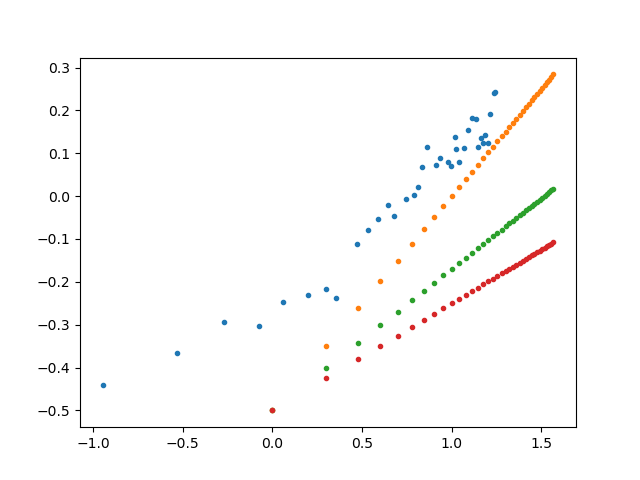

C:\Users\Anpuj\AppData\Local\Temp\ipykernel_10808\2882417289.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.max(t_corr)-t_corr),np.log10(np.mean(ws,axis=0)),'.',label='l=')


In [23]:
plt.figure()
plt.plot(np.log10(np.max(t_corr)-t_corr),np.log10(np.mean(ws,axis=0)),'.',label='l=')

In [26]:
plt.plot(np.log10(range(len(w))),-0.5+np.log10(range(len(w)))*0.25,'.',label='l=')

C:\Users\Anpuj\AppData\Local\Temp\ipykernel_10808\1467790849.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(range(len(w))),-0.5+np.log10(range(len(w)))*0.25,'.',label='l=')


<IPython.core.display.Javascript object>


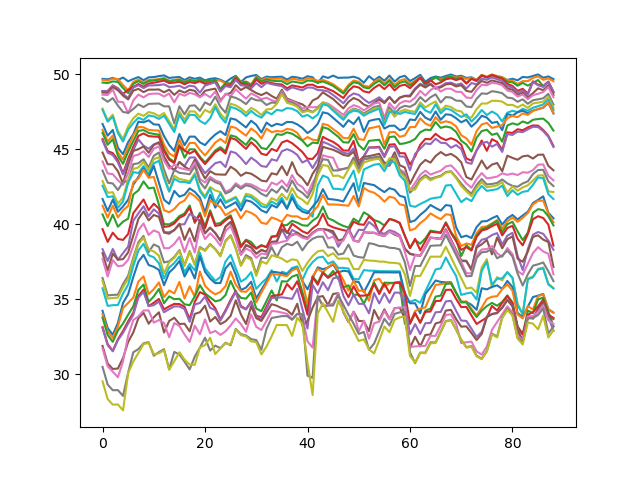

In [9]:
plt.figure()
for i in range(len(hs)):
    plt.plot(hs[i])

<IPython.core.display.Javascript object>


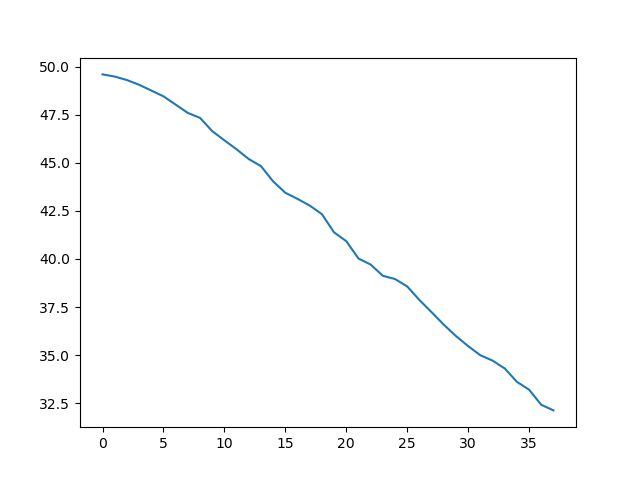

In [28]:
plt.figure()
plt.plot(t_corr)